In [4]:
# import the necessary packages
from skimage import feature
import numpy as np
import matplotlib.pyplot as plt
import cv2

class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius

	def describe(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
		# return the histogram of Local Binary Patterns
		return hist

In [5]:
def get_image_hist(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = desc.describe(gray)
    plt.figure(figsize=(10,5), dpi= 80)
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB));
    plt.subplot(1,2,2)
    plt.plot(hist)

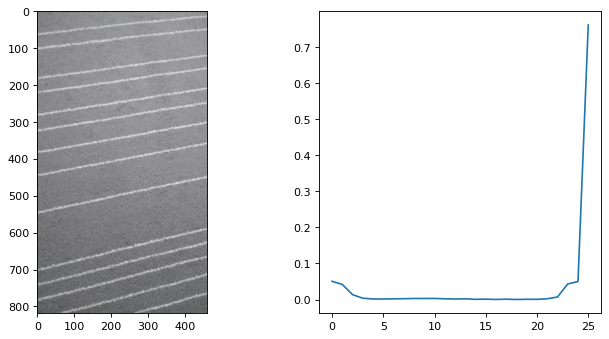

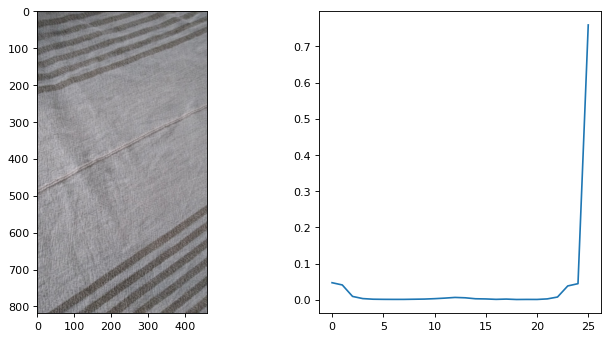

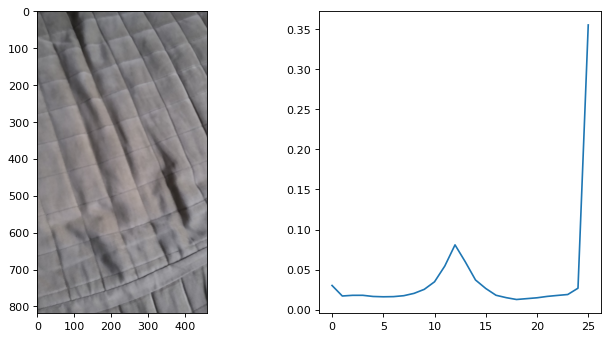

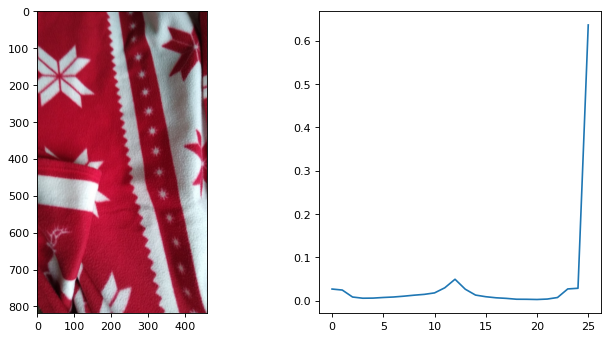

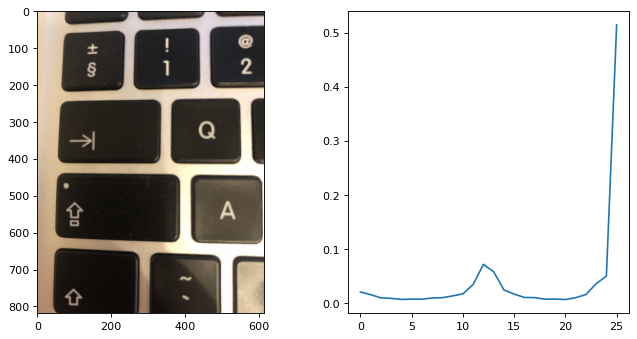

In [6]:
desc = LocalBinaryPatterns(24, 8)
arearug = cv2.imread('arearug.jpg')
bedcover = cv2.imread('bedcover.jpg')
bedcover2 = cv2.imread('bedcover2.jpg')
blanket = cv2.imread('blanket.jpg')
keyboard = cv2.imread('keyboard.jpg')

for image in [
    arearug,
    bedcover,
    bedcover2,
    blanket,
    keyboard
]:
    get_image_hist(image)